In [1]:
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np

import plotly.express as px

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import glob as glob
import gzip
import shutil
import xarray as xr


In [13]:
fpath_adj_sect  = '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/data/temp/adjusted_section_numbers_slater.nc'
fpath_masks1k = '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/data/temp/masks1k.nc'
folder_MARRACMO1km = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/data/raw/liquid/"


In [9]:
def convert_months_to_date(data_array, start_date): 
    '''
    This function converts the months since a start date to a date. For format dat_array as ds.time, start_date should 'YYYY-MM-DD'
    '''
    array_dates = np.empty(len(data_array)).astype('datetime64[ns]')
    for i in range(len(data_array)):
        array_dates[i] = pd.to_datetime(start_date) + pd.DateOffset(months=np.floor(data_array[i]), days=((data_array[i]%1)*30))
    return array_dates


def convert_years_to_date(data_array, start_date): 
    '''
    This function converts the years since a start date to a date. For format dat_array as ds.time, start_date should 'YYYY-MM-DD'
    '''
    array_dates = np.empty(len(data_array)).astype('datetime64[ns]')
    for i in range(len(data_array)):
        array_dates[i] = pd.to_datetime(start_date) + pd.DateOffset(years=np.floor(data_array[i]), days=((data_array[i]%1)*365))
    return array_dates


def open_compressed_xarray(file_path):
    '''
    Opens a compressed netcdf file with xarray
    '''
    # Path to the compressed file
    compressed_file = file_path

    # Path to the decompressed file
    decompressed_file = compressed_file.replace('.gz', '')

    # Decompress the file
    with gzip.open(compressed_file, 'rb') as f_in:
        with open(decompressed_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # Open the decompressed file with xarray
    ds = xr.open_dataset(decompressed_file, engine='netcdf4', decode_times=False)
    return ds


# Import sections

In [4]:
ds_adj_sect = xr.open_dataset(fpath_adj_sect)
# ds_masks1k = xr.open_dataset(fpath_masks1k)

# print both

ds_adj_sect
# print(ds_masks1k)


<xarray.Dataset> Size: 32MB
Dimensions:                   (y: 2700, x: 1496)
Coordinates:
  * y                         (y) float32 11kB -3.355e+06 ... -6.556e+05
  * x                         (x) float32 6kB -6.39e+05 -6.38e+05 ... 8.56e+05
Data variables:
    section_numbers_adjusted  (y, x) float64 32MB ...

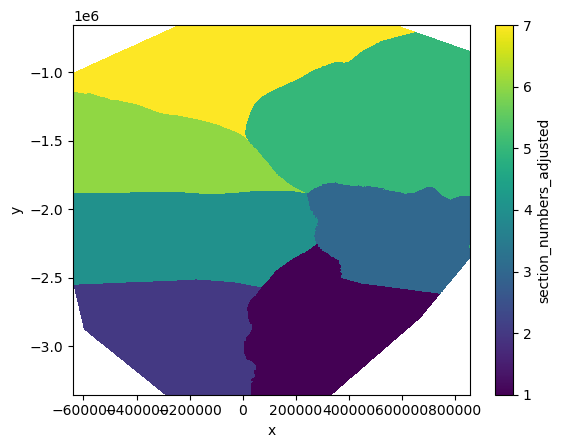

In [6]:
ds_adj_sect['section_numbers_adjusted'].plot()

# Import MASKS1 km

In [15]:
ds_masks1k = xr.open_dataset(fpath_masks1k)
ds_masks1k

<xarray.Dataset> Size: 355MB
Dimensions:           (time: 1, x: 1496, y: 2700)
Coordinates:
  * time              (time) float32 4B 0.0
  * x                 (x) float32 6kB 5.0 10.0 15.0 ... 7.475e+03 7.48e+03
  * y                 (y) float32 11kB 5.0 10.0 15.0 ... 1.35e+04 1.35e+04
Data variables: (12/18)
    LON               (y, x) float32 16MB ...
    LAT               (y, x) float32 16MB ...
    Icemask           (y, x) float32 16MB ...
    Promicemask       (y, x) float32 16MB ...
    Topography        (y, x) float32 16MB ...
    GrIS              (y, x) float32 16MB ...
    ...                ...
    LSM_Qeqertarsuaq  (y, x) float32 16MB ...
    fjords_all        (y, x) float32 16MB ...
    LSM_average       (y, x) float64 32MB ...
    fjords            (y, x) float64 32MB ...
    small_clusters    (y, x) int64 32MB ...
    fjords_no_qqt     (y, x) int64 32MB ...
Attributes:
    title:                      Daily Surface mass balance field (RACMO2.3)
    institution:                ULg (Xavier Fettweis)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    history:                    Mon Aug 10 13:33:00 2020: ncks -v Easting,Nor...
    netcdf:                     4.3.2 of Jan  5 2015 11:27:10 $
    NCO:                        netCDF Operators version 4.8.0 (Homepage = ht...
    history_of_appended_files:  Mon Aug 10 13:33:00 2020: Appended file GIMP_...

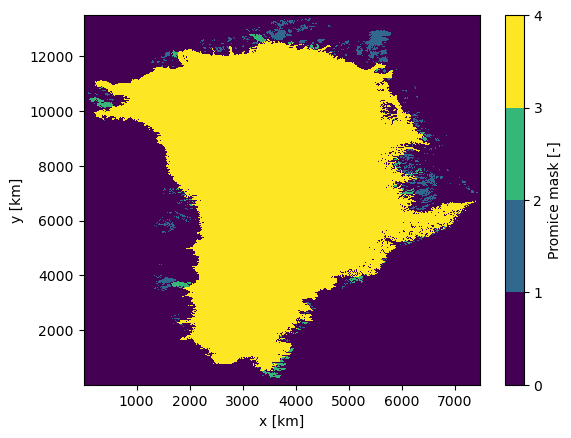

In [20]:
ds_masks1k['Promicemask'].plot(levels=[0,1,2,3, 4])

# Import MAR runoff

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_15087/1085035567.py:5: RuntimeWarning: invalid value encountered in cast
  array_dates = np.empty(len(data_array)).astype('datetime64[ns]')


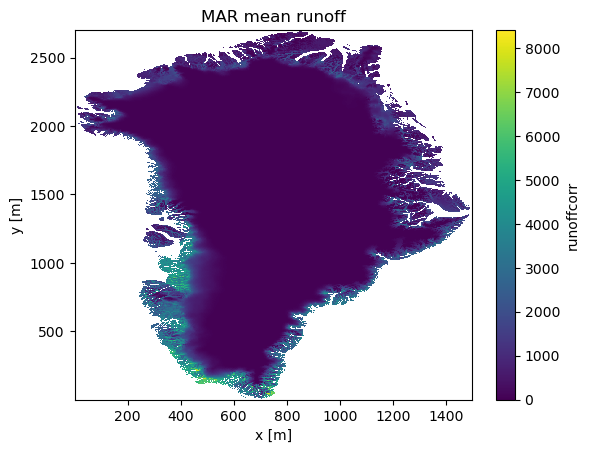

Text(0.5, 1.0, 'MAR mean runoff')

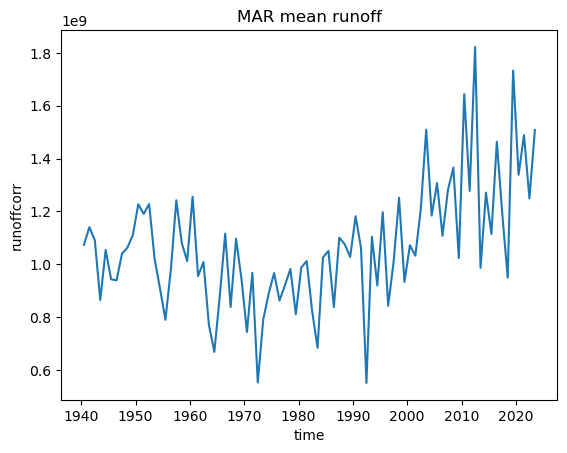

In [25]:
ds_run_MAR = open_compressed_xarray(folder_MARRACMO1km + "runoff.1940-2023.MARv3.14-ERA5.1km.YY.nc.gz")
ds_run_MAR['years_since_19400115'] = ds_run_MAR.time
ds_run_MAR['time'] = convert_months_to_date(ds_run_MAR['years_since_19400115'], '1940-01-15')

ds_run_MAR['runoffcorr'].mean(dim=['time']).plot()
plt.title("MAR mean runoff")
plt.show()
ds_run_MAR['runoffcorr'].sum(dim=['x', 'y']).plot()
plt.title("MAR mean runoff")

# IMport RACMO

In [75]:
ds_run_RACMO = open_compressed_xarray(folder_MARRACMO1km+ "runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz")
ds_run_RACMO['years_since_19580115'] = ds_run_RACMO.time
ds_run_RACMO['time'] = convert_years_to_date(ds_run_RACMO['years_since_19580115'], '1958-01-15')
ds_runoff_RACMO_mean = ds_run_RACMO.sum(dim=['time'])
ds_runoff_RACMO_mean['section_numbers_adjusted'] = ds_runoff_RACMO_mean['runoffcorr'].copy(deep=True)
ds_runoff_RACMO_mean['section_numbers_adjusted'].values = ds_adj_sect['section_numbers_adjusted'].values

for var in ds_masks1k.data_vars:
    ds_runoff_RACMO_mean[var] = ds_runoff_RACMO_mean['runoffcorr'].copy(deep=True)
    ds_runoff_RACMO_mean[var].values = ds_masks1k[var].values


In [36]:
ds_run_MAR_mean = ds_run_MAR.mean(dim=['time'])
ds_run_MAR_mean['section_numbers_adjusted'] = ds_run_MAR_mean['runoffcorr'].copy(deep=True)
ds_run_MAR_mean['section_numbers_adjusted'].values = ds_adj_sect['section_numbers_adjusted'].values

# do this for all data variables in ds_masks1k
for var in ds_masks1k.data_vars:
    ds_run_MAR_mean[var] = ds_run_MAR_mean['runoffcorr'].copy(deep=True)
    ds_run_MAR_mean[var].values = ds_masks1k[var].values



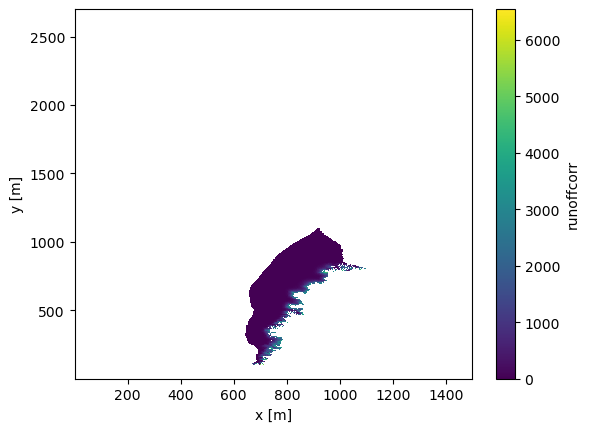

In [35]:
ds_run_MAR_mean['runoffcorr'].where((ds_run_MAR_mean['Promicemask'] == 3) & (ds_run_MAR_mean['section_numbers_adjusted'] == 1)).plot()

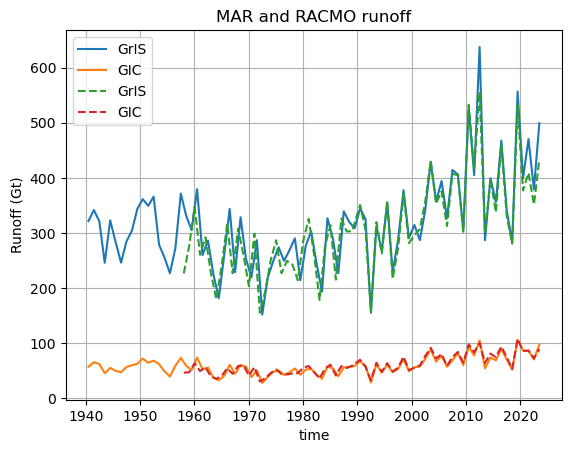

In [63]:
fig, ax = plt.subplots()

(ds_run_MAR['runoffcorr'].where(ds_run_MAR_mean['GrIS']==1).sum(dim=['x', 'y'])/1e6).plot(ax=ax, label='GrIS')
(ds_run_MAR['runoffcorr'].where(ds_run_MAR_mean['GIC']==1).sum(dim=['x', 'y'])/1e6).plot(ax=ax, label='GIC') 
# ds_run_MAR['runoffcorr'].where(ds_run_MAR_mean['Icemask']==0).sum(dim=['x', 'y']).plot(ax=ax, label='Tundra')

(ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GrIS']==1).sum(dim=['x', 'y'])/1e6).plot(ax=ax, label='GrIS', linestyle='--') 
(ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GIC']==1).sum(dim=['x', 'y'])/1e6).plot(ax=ax, label='GIC', linestyle='--') 
# ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['Icemask']==0).sum(dim=['x', 'y']).plot(ax=ax, label='Tundra', linestyle='--')
plt.ylabel('Runoff (Gt)')
plt.grid()
plt.title('MAR and RACMO runoff')
plt.legend()

In [85]:
ds_run_MAR_GrIS_basin = (ds_run_MAR['runoffcorr'].where(ds_run_MAR_mean['GrIS']==1).groupby(ds_run_MAR_mean['section_numbers_adjusted']).sum()/1e6)
ds_run_RACMO_GrIS_basin = (ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GrIS']==1).groupby(ds_runoff_RACMO_mean['section_numbers_adjusted']).sum()/1e6)
ds_run_MAR_GIC_basin = (ds_run_MAR['runoffcorr'].where(ds_run_MAR_mean['GIC']==1).groupby(ds_run_MAR_mean['section_numbers_adjusted']).sum()/1e6)
ds_run_RACMO_GIC_basin = (ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GIC']==1).groupby(ds_runoff_RACMO_mean['section_numbers_adjusted']).sum()/1e6)


ofolder = '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/data/processed/runoff'
# output data file
# export to csv
ds_run_MAR_GrIS_basin.to_dataframe().to_csv(ofolder + '/MAR_GrIS_basin_Annual_1km_1940_2023.csv')
ds_run_RACMO_GrIS_basin.to_dataframe().to_csv(ofolder + '/RACMO_GrIS_basin_Annual_1km_1958_2023.csv')
ds_run_MAR_GIC_basin.to_dataframe().to_csv(ofolder + '/MAR_GIC_basin_Annual_1km_1940_2023.csv')
ds_run_RACMO_GIC_basin.to_dataframe().to_csv(ofolder + '/RACMO_GIC_basin_Annual_1km_1958_2023.csv')

# Mean difference between MAR RACMO GrIS

mean difference in Gt: 
15.889573


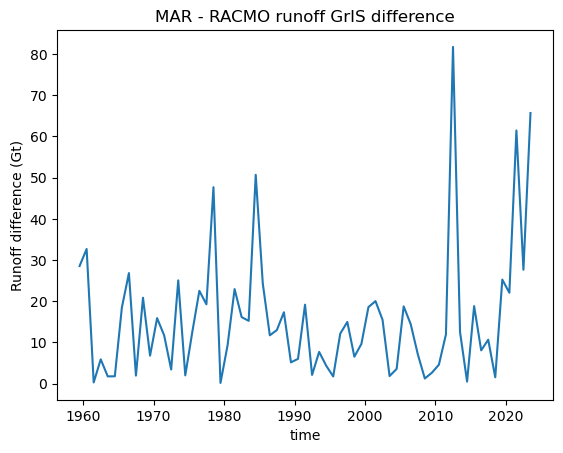

mean difference in %: 
5.1150947


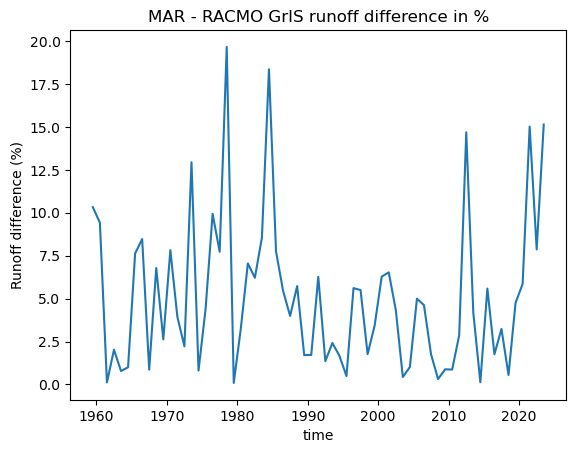

In [143]:
np.abs(ds_run_MAR_GrIS_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:]).plot()
# print the mean difference in Gt
print("mean difference in Gt: ")
print(np.abs(ds_run_MAR_GrIS_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:]).mean().values)
# 
plt.ylabel('Runoff difference (Gt)')
plt.title('MAR - RACMO runoff GrIS difference')
plt.show()

# plot in percent
(np.abs(ds_run_MAR_GrIS_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:])/(ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:])*100).plot()
plt.title('MAR - RACMO GrIS runoff difference in %')
plt.ylabel('Runoff difference (%)')
print("mean difference in %: ")
print((np.abs(ds_run_MAR_GrIS_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:])/np.mean(ds_run_RACMO_GrIS_basin.sum(dim=['section_numbers_adjusted']).values[1:])*100).mean().values)
plt.show()


# Mean difference MAR RACMO GIC

mean difference in Gt: 
3.3130536


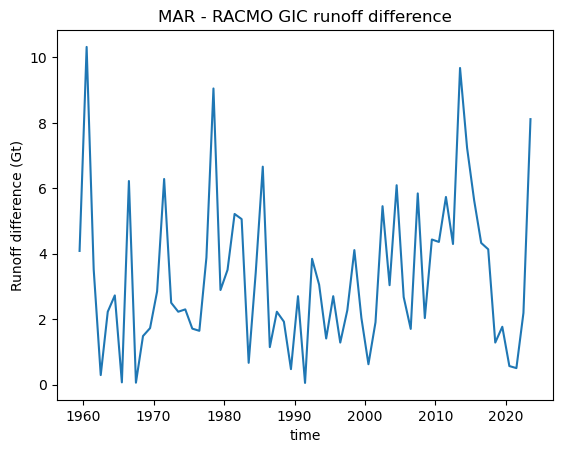

mean difference in %: 
5.4643936


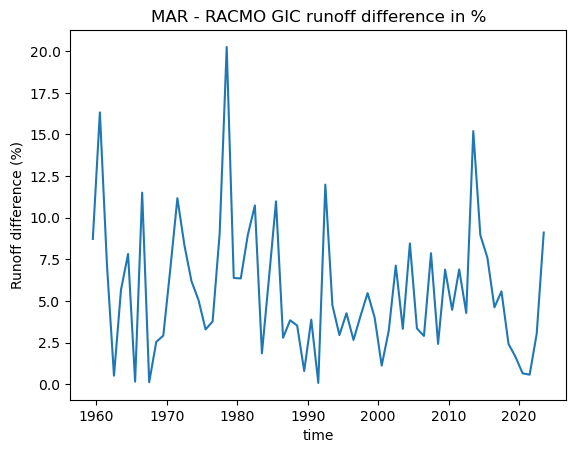

In [144]:
np.abs(ds_run_MAR_GIC_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:]).plot()
plt.ylabel('Runoff difference (Gt)')
plt.title('MAR - RACMO GIC runoff difference')

print("mean difference in Gt: ")
print(np.abs(ds_run_MAR_GIC_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:]).mean().values)
plt.show()

# plot in percent
((np.abs(ds_run_MAR_GIC_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:]))/(ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:])*100).plot()
plt.title('MAR - RACMO GIC runoff difference in %')
plt.ylabel('Runoff difference (%)')
print("mean difference in %: ")
print((np.abs(ds_run_MAR_GIC_basin.sum(dim=['section_numbers_adjusted']).sel(time=slice(pd.to_datetime('1959'), None))- ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:])/np.mean(ds_run_RACMO_GIC_basin.sum(dim=['section_numbers_adjusted']).values[1:])*100).mean().values)

# Differences per basin

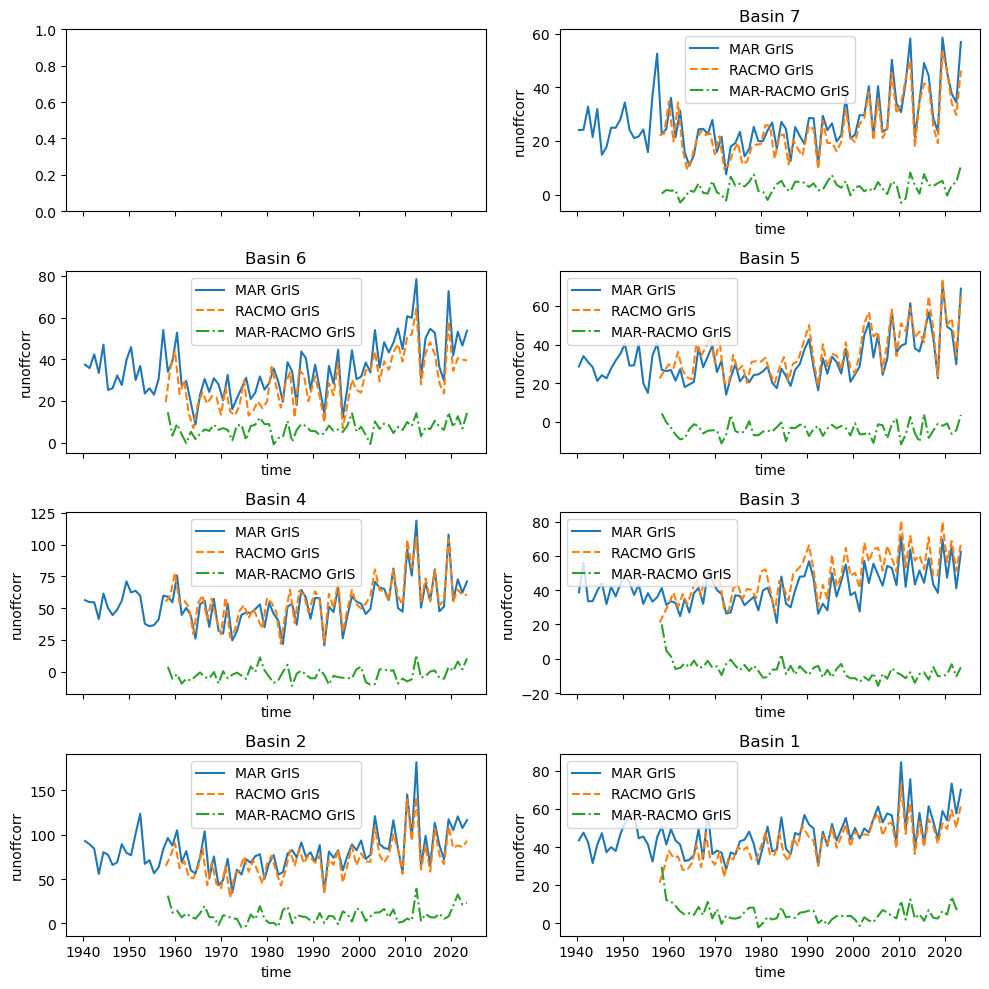

In [110]:

fig, axs = plt.subplots(4,2, sharex=True, sharey=False, figsize=(10,10))



for i in range(1,8):
    ax_number = 8-i
    ax = axs.flatten()[ax_number]
    ds_run_MAR_GrIS_basin.sel(section_numbers_adjusted=i).plot(ax=ax, label='MAR GrIS')
    ds_run_RACMO_GrIS_basin.sel(section_numbers_adjusted=i).plot(ax=ax, label='RACMO GrIS', linestyle='--')
    # plot the (absolute) difference
    (ds_run_MAR_GrIS_basin.sel(section_numbers_adjusted=i).sel(time=slice(pd.to_datetime('1958'), None)) - ds_run_RACMO_GrIS_basin.sel(section_numbers_adjusted=i).values).plot(ax=ax, label='MAR-RACMO GrIS', linestyle='-.')
    ax.legend()
    ax.set_title(f'Basin {i}')

plt.tight_layout()

In [121]:
no = 6
MAR = ds_run_MAR_GrIS_basin.sel(section_numbers_adjusted=no).to_dataframe().drop(columns=['section_numbers_adjusted'])
RACMO = ds_run_RACMO_GrIS_basin.sel(section_numbers_adjusted=no).to_dataframe().drop(columns=['section_numbers_adjusted'])
MAR_RACMO = (ds_run_MAR_GrIS_basin.sel(section_numbers_adjusted=no).sel(time=slice(pd.to_datetime('1958'), None)) - ds_run_RACMO_GrIS_basin.sel(section_numbers_adjusted=no).values).to_dataframe().drop(columns=['section_numbers_adjusted'])

In [122]:
# ADD RACMO AND MAR TO PLOTLY

import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=MAR.index, y=MAR['runoffcorr'], mode='lines', name='MAR'))
fig.add_trace(go.Scatter(x=RACMO.index, y=RACMO['runoffcorr'], mode='lines', name='RACMO'))
fig.add_trace(go.Scatter(x=MAR_RACMO.index, y=MAR_RACMO['runoffcorr'], mode='lines', name='MAR-RACMO'))
fig.show()

                          runoffcorr
section_numbers_adjusted            
1.0                         2.280050
2.0                         1.238556
3.0                         1.597058
4.0                         0.486367
5.0                         2.999255
6.0                         0.729801
7.0                         0.976203


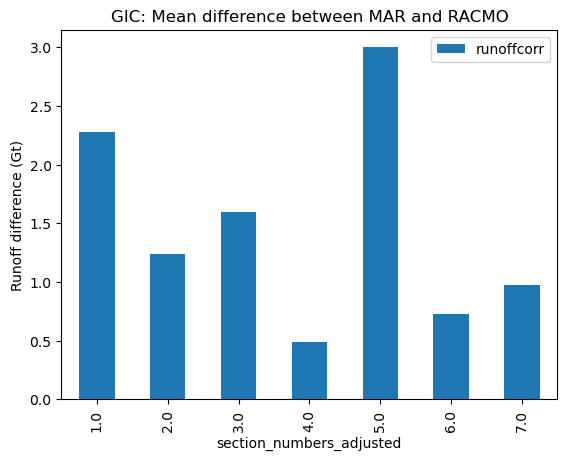

                          runoffcorr
section_numbers_adjusted            
1.0                         3.961403
2.0                         8.853963
3.0                         9.204663
4.0                         4.786875
5.0                         4.609396
6.0                         7.107379
7.0                         3.185209


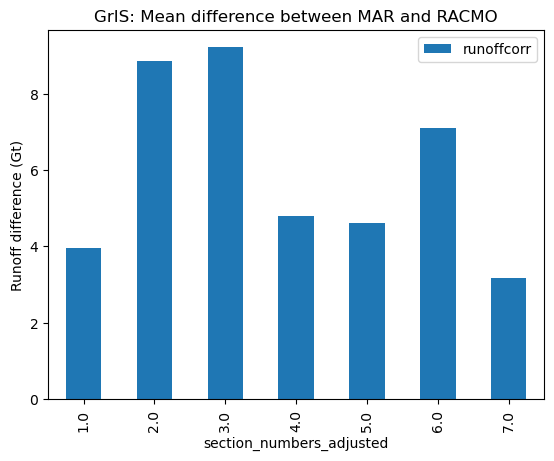

In [125]:
(np.abs(ds_run_MAR_GIC_basin - ds_run_RACMO_GIC_basin)).mean(dim='time').to_dataframe().plot.bar()
plt.title('GIC: Mean difference between MAR and RACMO')
plt.ylabel('Runoff difference (Gt)')
print((np.abs(ds_run_MAR_GIC_basin - ds_run_RACMO_GIC_basin)).mean(dim='time').to_dataframe())
plt.show()

np.abs(ds_run_MAR_GrIS_basin - ds_run_RACMO_GrIS_basin).mean(dim='time').to_dataframe().plot.bar()
plt.title('GrIS: Mean difference between MAR and RACMO')
plt.ylabel('Runoff difference (Gt)')
print((np.abs(ds_run_MAR_GrIS_basin - ds_run_RACMO_GrIS_basin)).mean(dim='time').to_dataframe())
plt.show()
# also print the data frames


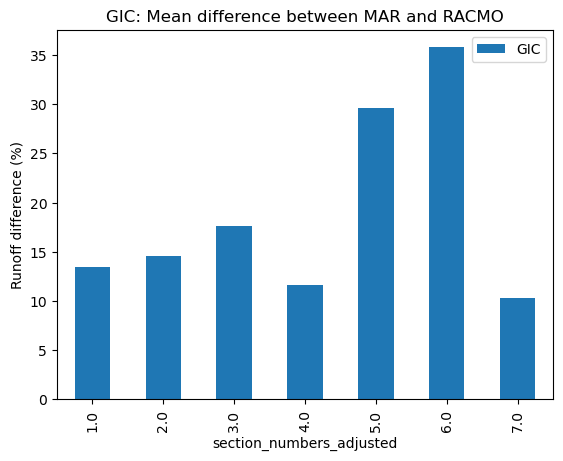

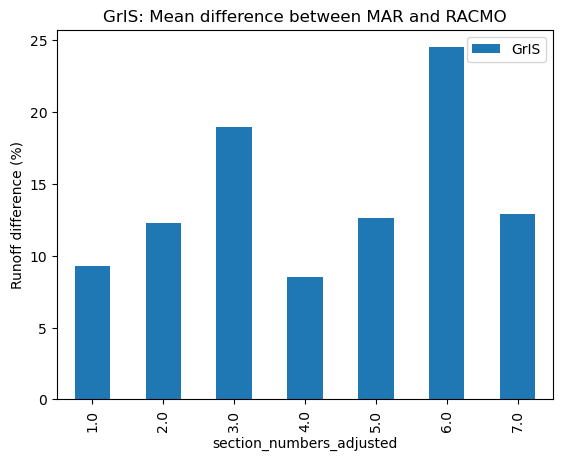

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean difference for GIC and normalize it
gic_diff = (np.abs(ds_run_MAR_GIC_basin - ds_run_RACMO_GIC_basin)).mean(dim='time') / ds_run_RACMO_GIC_basin.mean(dim='time') * 100
gic_diff.to_dataframe().plot.bar()
plt.title('GIC: Mean difference between MAR and RACMO')
plt.ylabel('Runoff difference (%)')
plt.legend(['GIC'])

# Calculate the mean difference for GrIS
gris_diff = np.abs(ds_run_MAR_GrIS_basin - ds_run_RACMO_GrIS_basin).mean(dim='time')/ ds_run_RACMO_GrIS_basin.mean(dim='time') * 100
gris_diff.to_dataframe().plot.bar()
plt.title('GrIS: Mean difference between MAR and RACMO')
plt.ylabel('Runoff difference (%)')
plt.legend(['GrIS'])

# Show the plots
plt.show()